In [1]:
import nltk
import pandas as pd
import pysentiment2 as ps
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords, PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import requests
import numpy as np
from datetime import datetime

In [2]:
# nltk.download('wordnet')

In [3]:
fh_key = 'bt3efpf48v6tfcs816eg'
fm_key = '8a1cf9d14d53126b05c8a7636fe3d006'
ticker = 'AAPL'
today = datetime.today().strftime('%Y-%m-%d')

market_news = requests.get(f'https://finnhub.io/api/v1/news?category=general&token={fh_key}').json()
market_news = pd.DataFrame(market_news)
# np.unique(market.source)

company_news = requests.get(f'https://finnhub.io/api/v1/company-news?symbol={ticker}&from={today}&to={today}&token={fh_key}').json()
company_news = pd.DataFrame(company_news)

stock_news = requests.get(f'https://financialmodelingprep.com/api/v3/stock_news?tickers={ticker}&limit=50&apikey={fm_key}').json()
stock_news = pd.DataFrame(stock_news)
# stock_news

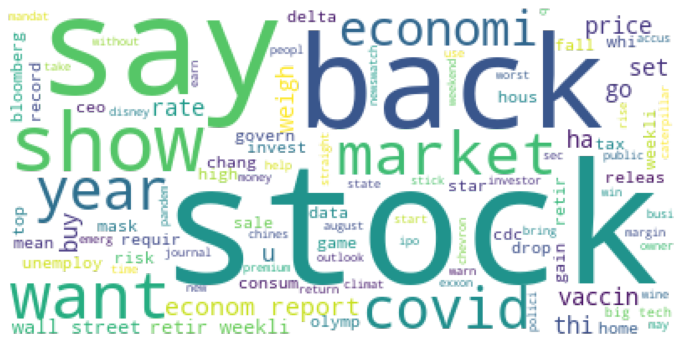

In [4]:
market_news = market_news.loc[:,['headline']]
stop_words = set(stopwords.words('english'))
lm = ps.LM()
market_news.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
market_news['headline'] = market_news['headline'].str.lower()
headlines  = []
head_clean = []
sentscore  = []
porter = PorterStemmer()
for row in range(len(market_news.index)):
    document = ' '.join(str(x) for x in market_news.iloc[row,:])
    headlines.append(document)
    tokens  =  word_tokenize(document)
    stemmed = [porter.stem(word) for word in tokens]
    words   = [w for w in stemmed if not w in stop_words]
    head_clean.append(' '.join(word for word in words))
    tokens  = lm.tokenize(' '.join(word for word in words))
    sentscore.append(lm.get_score(tokens)['Polarity'])

market_proc = pd.DataFrame(head_clean, columns = ['processed'])
market_proc['origi'] = headlines
entir = ' '.join(doc for doc in head_clean)

# market_proc

# Plot 100 most frequent words
wc = WordCloud(max_words = 100, stopwords = stopwords.words('english').append(['u', 'ha', 'wa', 'say']),\
               background_color = None, mode = "RGBA" ).generate_from_text(entir)
plt.figure(figsize = (12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

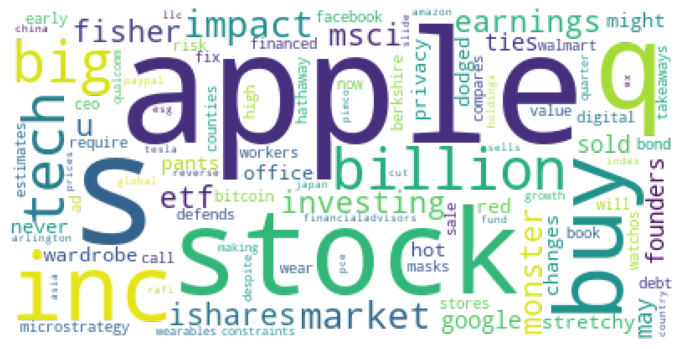

In [5]:
company_news = company_news.loc[:,['headline']]
stop_words = set(stopwords.words('english'))
lm = ps.LM()
company_news.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
company_news['headline'] = company_news['headline'].str.lower()
headlines  = []
head_clean = []
sentscore  = []
porter = PorterStemmer()
for row in range(len(company_news.index)):
    document = ' '.join(str(x) for x in company_news.iloc[row,:])
    headlines.append(document)
    tokens  =  word_tokenize(document)
    stemmed = [porter.stem(word) for word in tokens]
    words   = [w for w in stemmed if not w in stop_words]
    head_clean.append(' '.join(word for word in words))
    tokens  = lm.tokenize(' '.join(word for word in words))
    sentscore.append(lm.get_score(tokens)['Polarity'])

company_proc = pd.DataFrame(head_clean, columns = ['processed'])
company_proc['origi'] = headlines
# entir_comp = ' '.join(doc for doc in head_clean)
entir_comp = ' '.join(doc for doc in headlines)

# companu_proc

# Plot 100 most frequent words
wc = WordCloud(max_words = 100, stopwords = stopwords.words('english').append(['u', 'ha', 'wa', 'say', 'q']),\
               background_color = None, mode = "RGBA" ).generate_from_text(entir_comp)
plt.figure(figsize = (12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

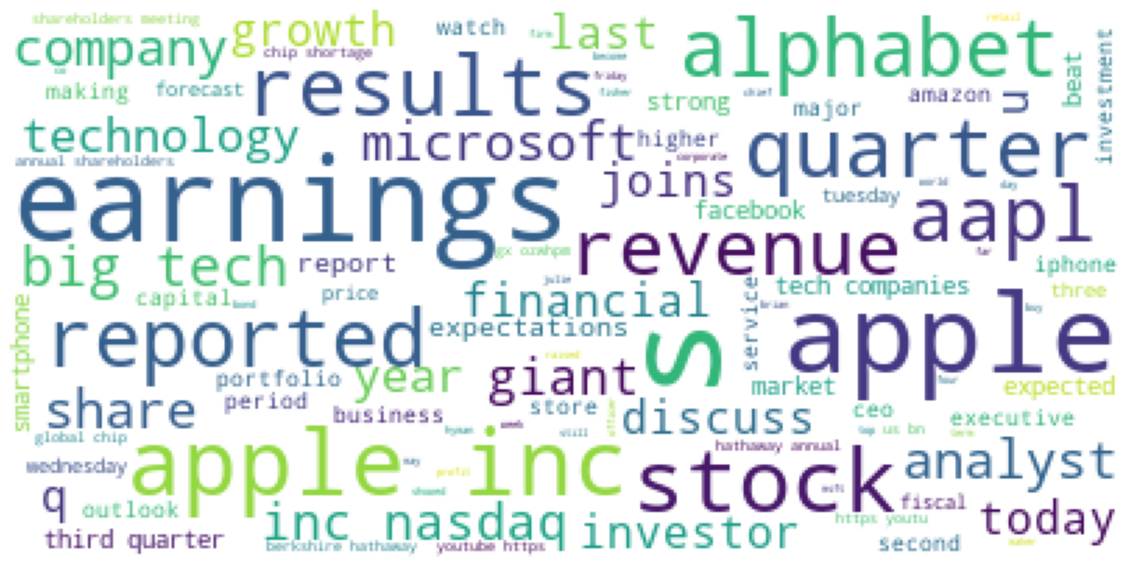

In [37]:
stock_news = stock_news.loc[:,['text']]
stop_words = set(stopwords.words('english'))
lm = ps.LM()
stock_news.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
stock_news['text'] = stock_news['text'].str.lower()
headlines  = []
head_clean = []
sentscore  = []
porter = PorterStemmer()
for row in range(len(stock_news.index)):
    document = ' '.join(str(x) for x in stock_news.iloc[row,:])
    headlines.append(document)
    tokens  =  word_tokenize(document)
    stemmed = [porter.stem(word) for word in tokens]
    words   = [w for w in stemmed if not w in stop_words]
    head_clean.append(' '.join(word for word in words))
    tokens  = lm.tokenize(' '.join(word for word in words))
    sentscore.append(lm.get_score(tokens)['Polarity'])

stock_proc = pd.DataFrame(head_clean, columns = ['processed'])
stock_proc['origi'] = headlines
# entir_stock = ' '.join(doc for doc in head_clean)
entir_stock = ' '.join(doc for doc in headlines)

# stock_proc

# Plot 100 most frequent words
# wc = WordCloud(max_words = 100, background_color = None, mode = "RGBA" ).generate_from_text(entir_stock)
wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_text(entir_stock)
plt.figure(figsize = (20, 20))
plt.imshow(wc)
plt.axis('off')
plt.show()
# wc.to_file("/Users/erinnnz/SeaBridge/Keywords_extract/test.png")

In [7]:
# for ind in range(len(market_proc)):
#     file_id = str(ind)
#     with open('file_'+file_id+'.txt','w') as fout:
#         fout.write(market_proc.processed[ind])
#         fout.close()

# newcorpus = PlaintextCorpusReader('/Users/erinnnz/SeaBridge/Keywords_extract/Corpus', '.*')

# newcorpus

In [8]:
# def dtm_from_corpus(xCorpus):
#     '''
#     Create a dtm from a corpus. 
#     '''
#     s = 0
#     # this code works on my laptop, but if you have an apple these usually put
#     # in a .DS_Store file. Uncommenting the below might work in that case
#     # probably... make sure there are no hidden files in your Corpus folder!
#     # if so, these need to not be included in the dtm obviously. I feel like
#     # there should be a better way to do this, but this is it for now.

#     #if '.DS_Store' in newcorpus.fileids(): s=1

#     fd_list = []
#     for x in range(s, len(xCorpus.fileids())):
#         fd_list.append(nltk.FreqDist(xCorpus.words(xCorpus.fileids()[x])))
#     dtm = pd.DataFrame(fd_list, index = xCorpus.fileids()[s:])
#     dtm.fillna(0,inplace = True)
#     return dtm


# dtm = dtm_from_corpus(newcorpus)

# dtm.sum()

In [9]:
# def word_frequency(sentence,stopwords):
#     '''
#     joins all the sentence, creates tokens, creates lower class, removes
#     numbers and lemmatizes the words
#     '''
#     new_tokens = word_tokenize(sentence)
#     new_tokens = [t.lower() for t in new_tokens]
#     new_tokens =[t for t in new_tokens if t not in stop_words]
#     new_tokens = [t for t in new_tokens if t.isalpha()]
#     lemmatizer = WordNetLemmatizer()
#     new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#     #counts the words, pairs and trigrams
#     counted   = Counter(new_tokens)
#     counted_2 = Counter(ngrams(new_tokens,2))
#     counted_3 = Counter(ngrams(new_tokens,3))
#     #creates 3 data frames and returns thems
#     word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
#     word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
#     trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
#     return word_freq,word_pairs,trigrams

# data2, data3, data4 = word_frequency(entir,stop_words)

In [11]:
entir_stock

'tesla inc chief executive officer elon musk on friday showed his support for fortnite maker epic games  commenting on apple inc s fees on its app store  earnings showed big tech companies shrugged off any impact so far from apple s privacy changes  especially as digital ad spend is surging  q  may be different  should investors be excited or worried when a stock crosses above the    day simple moving average  i have recently been exploring the valuations of technology stocks  even though these have been some of the best performing investments to own over the past    years  certain companies still appear relatively cheap on some metrics  the world s most popular smartphone is increasingly a tool and decreasingly a profit center in and of itself  apple s iphone    mini is perfect for those frustrated by how big smartphones have become  but you ll have to compromise on battery life  taiwan semiconductor manufacturing co ltd s most important plant supplying apple inc s processors has been